In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
import os
import h5py
from astroquery.nist import Nist
import astropy.units as u
from itertools import chain
from interface import searchLines

rng = [15000,17000]

In [110]:
OH_lines_wn = []
with open('HITEMP/OH.par', 'r') as file:
    for line in file:
        OH_lines_wn.append(line[3:15])
        
NO_lines_wn = []
with open('HITEMP/NO.par', 'r') as file:
    for line in file:
        NO_lines_wn.append(line[3:15])
        
CO_lines_wn = []
with open('HITEMP/CO.par', 'r') as file:
    for line in file:
        CO_lines_wn.append(line[3:15])
        
H2O_lines_wn = []
with open('/home/jess/Downloads/01_5500-6000_HITEMP2010.par', 'r') as file:
    for line in file:
        H2O_lines_wn.append(line[3:15])
with open('/home/jess/Downloads/01_6000-6500_HITEMP2010.par', 'r') as file:
    for line in file:
        H2O_lines_wn.append(line[3:15])
with open('/home/jess/Downloads/01_6500-7000_HITEMP2010.par', 'r') as file:
    for line in file:
        H2O_lines_wn.append(line[3:15])
        
CO2_lines_wn = []
with open('/home/jess/Downloads/02_5500-6000_HITEMP2010.par', 'r') as file:
    for line in file:
        CO2_lines_wn.append(line[3:15])
with open('/home/jess/Downloads/02_6000-6500_HITEMP2010.par', 'r') as file:
    for line in file:
        CO2_lines_wn.append(line[3:15])
with open('/home/jess/Downloads/02_6500-12785_HITEMP2010.par', 'r') as file:
    for line in file:
        CO2_lines_wn.append(line[3:15])

In [117]:
len(OH_lines_wn), len(NO_lines_wn), len(CO_lines_wn), len(H2O_lines_wn), len(CO2_lines_wn)

(41557, 115610, 113631, 9917768, 1016225)

In [118]:
OH_lines = np.array([10**8/float(line) for line in OH_lines_wn])
NO_lines = np.array([10**8/float(line) for line in NO_lines_wn])
CO_lines = np.array([10**8/float(line) for line in CO_lines_wn])
H2O_lines = np.array([10**8/float(line) for line in H2O_lines_wn])
CO2_lines = np.array([10**8/float(line) for line in CO2_lines_wn])

In [137]:
OH_ap_rng = np.where((OH_lines > rng[0]) & (OH_lines < rng[1]))
NO_ap_rng = np.where((NO_lines > rng[0]) & (NO_lines < rng[1]))
CO_ap_rng = np.where((CO_lines > rng[0]) & (CO_lines < rng[1]))
H2O_ap_rng = np.where((H2O_lines > rng[0]) & (H2O_lines < rng[1]))
CO2_ap_rng = np.where((CO2_lines > rng[0]) & (CO2_lines < rng[1]))

OH_AP = OH_lines[OH_ap_rng][::-1]
NO_AP = NO_lines[NO_ap_rng][::-1]
CO_AP = CO_lines[CO_ap_rng][::-1]
H2O_AP = H2O_lines[H2O_ap_rng][::-1]
CO2_AP = CO2_lines[CO2_ap_rng][::-1]

In [138]:
len(OH_AP), len(NO_AP), len(CO_AP), len(H2O_AP), len(CO2_AP)

(2371, 8432, 4055, 5294872, 549734)

In [139]:
hf = h5py.File('HITEMP.hdf5', 'w')
hf.create_dataset('OH', data=OH_AP)
hf.create_dataset('NO', data=NO_AP)
hf.create_dataset('CO', data=CO_AP)
hf.create_dataset('H2O', data=H2O_AP)
hf.create_dataset('CO2', data=CO2_AP)
hf.close()

In [140]:
hf = h5py.File('HITEMP.hdf5', 'r')
print(list(hf.keys()))
hf.close()

['CO', 'CO2', 'H2O', 'NO', 'OH']


In [263]:
hf = h5py.File('SOUTO.hdf5', 'w')
for key in list(lines.keys()):
    hf.create_dataset(key, data=lines[key])
hf.close()

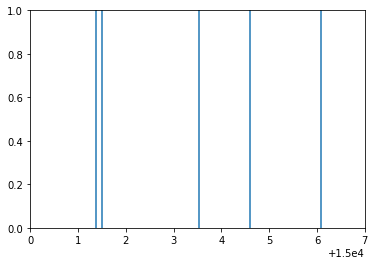

In [145]:
for i in range(5):
    plt.axvline(OH_AP[i])
plt.xlim(15000, 15007)
plt.show()

In [250]:
atoms = []
with open('APOGEE/turboatoms.201404080919', 'r') as file:
    for line in file:
        atoms.append(line[0:10])
atoms = np.array(atoms)

In [164]:
atoms[0:7]

["' 2.0000  ",
 "'HE I '\n",
 ' 15062.414',
 ' 15062.435',
 ' 15062.437',
 ' 15083.656',
 ' 15929.711']

In [237]:
atom_names, atom_ind = [], []
for i in range(len(atoms)):
    if "\n" in atoms[i]:
        name = atoms[i].strip("'").strip("'\n")
        if name[-1] == " ":
            name = name[0:-1]
        name = " ".join(name.split())
        
        atom_names.append(name)
        atom_ind.append(i)

In [258]:
atom_group = [atoms[np.arange(atom_ind[i]+2, atom_ind[i+1])-1] for i in range(len(atom_ind)-1)]
atom_group.append(np.arange(atom_ind[-1], len(atoms)))
atom_group = np.array([a.astype(float) for a in atom_group])

In [284]:
dic = {}
for i in range(len(atom_names)):
    dic[atom_names[i]] = atom_group[i]

hf = h5py.File('compressed/APOGEE_ATOMS.hdf5', 'w')
for key in dic.keys():
    hf.create_dataset(key, data=dic[key])
hf.close()

In [289]:
molec = []
with open('raw/APOGEE/turbomolec.201404080919', 'r') as file:
    for line in file:
        molec.append(line[0:10])
molec = np.array(molec)

atom_names, atom_ind = [], []
for i in range(len(molec)):
    if "\n" in molec[i]:
        name = molec[i].strip("'").strip("'\n")
        if name[-1] == " ":
            name = name[0:-1]
        name = " ".join(name.split())
        
        atom_names.append(name)
        atom_ind.append(i)
        
atom_group = [molec[np.arange(atom_ind[i]+2, atom_ind[i+1])-1] for i in range(len(atom_ind)-1)]
atom_group.append(np.arange(atom_ind[-1], len(molec)))
atom_group = np.array([a.astype(float) for a in atom_group])

dic = {}
for i in range(len(atom_names)):
    dic[atom_names[i]] = atom_group[i]

hf = h5py.File('compressed/APOGEE_MOLEC.hdf5', 'w')
for key in dic.keys():
    hf.create_dataset(key, data=dic[key])
hf.close()

In [299]:
elem = ['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag','Cd','In','Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce']

In [296]:
table = Nist.query(1500 * u.nm, 1700 * u.nm, linename="Fe II")

In [300]:
dir_path = os.path.dirname(os.path.realpath(__file__))
print(dir_path)
def listLibraries():
    os.listdir(dir_path)

NameError: name '__file__' is not defined

In [394]:
searchLines(species=['Fe I'], lib=['APOGEE_ATOMS'], range=[15300,15320])

Searching library /home/jess/Desktop/Research/line_interface/compressed/APOGEE_ATOMS.hdf5


{'FE I': array([15301.377, 15301.56 , 15302.862, 15304.078, 15305.374, 15305.606,
        15311.654, 15311.72 , 15311.919, 15312.932, 15313.227, 15313.516,
        15314.102, 15314.745, 15315.653, 15317.2  , 15319.333, 15319.819])}

In [410]:
searchLines(species=['Fe I'], lib=['NIST'], range=[15300,15320])

Searching NIST library.


{'Fe I': array([15300.088, 15300.343, 15300.685, 15300.992, 15301.348, 15305.739,
        15309.554, 15309.786, 15315.899, 15317.41 , 15319.836])}

In [308]:
PARENT = '/home/jess/Desktop/Research/line_interface'

def listSpecies(lib):

    hf = h5py.File(PARENT + '/compressed/' + lib + '.hdf5', 'r')
    species = list(hf.keys())
    hf.close()

    return species

In [311]:
print(listSpecies('APOGEE_MOLEC'))
print(listSpecies('APOGEE_ATOMS'))

['CC', 'CN', 'CO', 'HH', 'OH', 'SIH']
['AL I', 'AL II', 'AR I', 'AR II', 'AR III', 'AU I', 'B I', 'B II', 'C I', 'C II', 'C III', 'CA I', 'CA II', 'CA III', 'CE III', 'CL I', 'CL II', 'CL III', 'CO I', 'CO II', 'CR I', 'CR II', 'CR III', 'CS I', 'CU I', 'CU II', 'F I', 'F II', 'F III', 'FE I', 'FE II', 'FE III', 'GE I', 'HE I', 'K I', 'K III', 'LI I', 'MG I', 'MG II', 'MN I', 'MN II', 'MN III', 'N I', 'N II', 'N III', 'NA I', 'NE I', 'NE II', 'NI I', 'NI II', 'NI III', 'O I', 'O II', 'O III', 'P I', 'P II', 'P III', 'RB I', 'S I', 'S II', 'SC I', 'SC II', 'SC III', 'SI I', 'SI II', 'SI III', 'SR II', 'TI I', 'TI II', 'TI III', 'V I', 'V II', 'V III', 'Y I', 'Y II', 'ZN III']


In [318]:
d = h5py.File(PARENT + '/compressed/' + 'APOGEE_ATOMS' + '.hdf5', 'r')
list(d['FE I'])

[15000.048,
 15002.35,
 15004.01,
 15004.458,
 15005.104,
 15005.215,
 15005.298,
 15007.219,
 15007.69,
 15009.418,
 15009.488,
 15009.49,
 15011.262,
 15013.773,
 15015.465,
 15016.967,
 15017.702,
 15018.18,
 15018.223,
 15018.377,
 15020.304,
 15020.353,
 15022.319,
 15022.671,
 15023.452,
 15026.246,
 15026.25,
 15027.291,
 15029.937,
 15030.061,
 15030.649,
 15034.917,
 15035.179,
 15035.798,
 15036.16,
 15036.472,
 15039.868,
 15039.899,
 15040.08,
 15040.32,
 15040.814,
 15041.88,
 15044.003,
 15044.517,
 15044.978,
 15046.4,
 15046.921,
 15047.007,
 15047.657,
 15051.128,
 15051.749,
 15052.073,
 15053.379,
 15053.388,
 15053.825,
 15054.0,
 15054.233,
 15055.296,
 15056.977,
 15057.466,
 15062.149,
 15062.709,
 15063.052,
 15065.211,
 15065.665,
 15066.959,
 15067.043,
 15069.441,
 15069.725,
 15069.825,
 15069.891,
 15072.115,
 15072.122,
 15073.268,
 15075.452,
 15076.05,
 15077.241,
 15077.287,
 15077.289,
 15078.867,
 15078.995,
 15079.283,
 15080.225,
 15080.264,
 15081.